# Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial. This is an extension of linear regression, which only models linear relationships between variables.

**Key Points:**

- **Non-Linear Relationships:** Polynomial regression is used when the relationship between variables is not linear.
- **Flexibility:** It can capture complex patterns and curves in the data.
- **Degree of Polynomial:** The degree of the polynomial determines the complexity of the model.

## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Create sample data

In [4]:
np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Let's break down this code step by step

**1. `np.random.seed(0)`**

*   This line sets the seed for the random number generator. 
*   By setting the seed to a specific value (in this case, 0), you ensure that every time you run this code, you'll get the same sequence of random numbers. 
*   This is useful for reproducibility, allowing you to compare results consistently across different runs or if you need to debug any issues.

**2. `m = 100`**

*   This line defines a variable `m` and assigns it the value 100.
*   This variable will be used to determine the number of data points to generate.

**3. `X = 6 * np.random.rand(m, 1) - 3`**

*   `np.random.rand(m, 1)`: This part generates an array of `m` rows (100 rows) and 1 column of random numbers between 0 and 1. Each number is uniformly distributed within this range.
*   `6 * ...`: Multiplies each of these random numbers by 6, scaling them to a range between 0 and 6.
*   `... - 3`: Subtracts 3 from each scaled number, resulting in an array of random numbers between -3 and 3.
*   `X`: This array `X` now represents the input data for your model.

**4. `y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)`**

*   This line calculates the target variable `y` based on the input data `X`. 
*   `0.5 * X**2`: Calculates the square of each value in the `X` array and multiplies it by 0.5.
*   `+ X`: Adds the original values of `X` to the result of the previous calculation.
*   `+ 2`: Adds 2 to each value.
*   `+ np.random.randn(m, 1)`: Adds Gaussian noise to the calculated values. `np.random.randn(m, 1)` generates an array of `m` rows and 1 column of random numbers drawn from a standard normal distribution (mean 0, standard deviation 1). This noise introduces some randomness and makes the relationship between `X` and `y` less deterministic.

**In summary, this code block:**

- Sets the random seed for reproducibility.
- Defines the number of data points (`m`).
- Generates random input data `X` within a specific range.
- Creates the target variable `y` based on a quadratic function of `X` with added noise.

This generated data can then be used to train and evaluate different machine learning models, such as polynomial regression, to learn the relationship between `X` and `y`.


## Plot the data

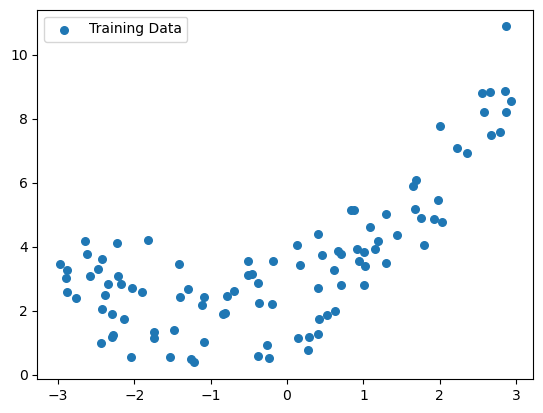

In [5]:
plt.scatter(X, y, s=30, label='Training Data')
plt.legend()
plt.show()

In [6]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.29288102])

In [7]:
X_poly[0]

array([1.        , 0.29288102, 0.08577929])

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [9]:
y_pred = lin_reg.predict(X_poly)

In [10]:
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

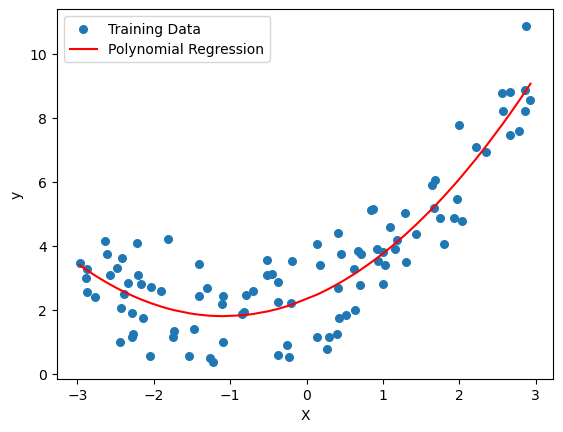

In [11]:
plt.scatter(X, y, s=30, label='Training Data')
plt.plot(X_sorted, y_pred_sorted, color='r', label='Polynomial Regression')  # Plot the curve

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Cross Validation

If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs
poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

### Learning curves
Another way is to look at the learning curves: these are plots of the model’s performance 
on the training set and the validation set as a function of the training set siz 
(or the training iteration). To generate the plots, simply train the model several tim s
on different sized subsets of  he training set. The following code defines a funct on
that plots the learning curves of a model given some training data:ex.

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('training set size')
    plt.ylabel('RMSE')
    plt.xlim(0, 80)
    plt.ylim(0, 3)
    plt.legend()
    plt.show()

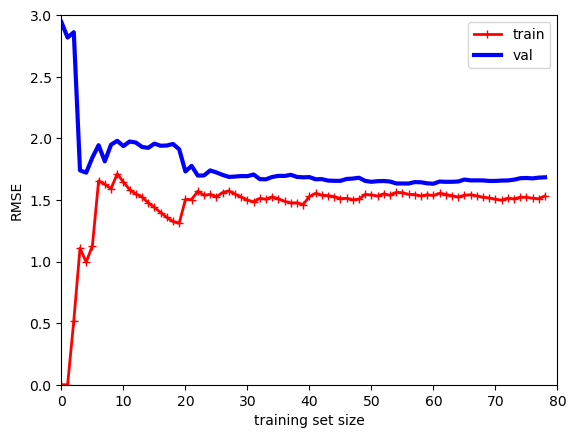

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This deserves a bit of explanation. First, let’s look at the performance on the training 
data: when there are just one or two instances in the training set, the model can fi 
them perfectly, which is why the curve starts at zero. But as new instances are add d
to the training set, it becomes impossible for the model to fit the training data perfect y,
both because the data is noisy and because it is not linear at all. So the erro  on
the training data goes up until it reaches a plateau, at which point adding new inst nces
to the training set doesn’t make the average error much better or worse. Now let’s
look at the performance of the model on the validation data. When the m del is
trained on very few training instances, it is incapable of generalizing properl , which
is why the validation error is initially quite big. Then as the model is s own more
training examples, it learns and thus the validation error slowly goes down  However,
once again a straight line cannot do a good job modeling the data, so the error ends
up at a plateau, very close to the  
ther curve.
These learning curves are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same 
data

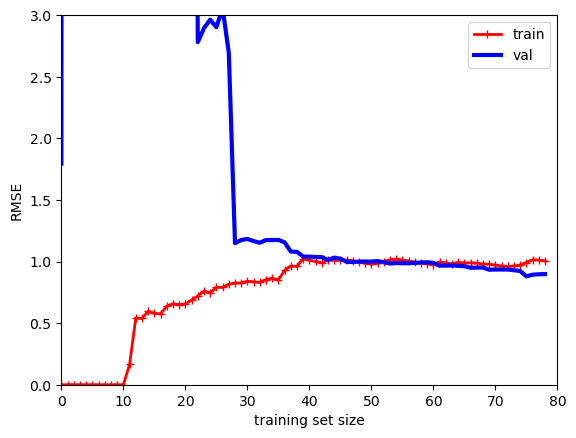

In [26]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very important differences:
* The error on the training data is much lower than with the Linear Regression
model.
* There is a gap between the curves. This means that the model performs significantly
better on the training data than on the validation data, which is the hallmark
of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.